<a href="https://colab.research.google.com/github/sheddyranking/Dog_Breeds_Classification/blob/main/Classifying_Dog_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNZIP THE FILES**

In [1]:
#!unzip "/content/drive/MyDrive/ Classifying_Dogs_Breeds/dog-breed-identification.zip" -d "/content/drive/MyDrive/ Classifying_Dogs_Breeds/" 

# Using Transfer Learning and TensorFlow to Classify Different Dog Breeds 🐶

## Problem
Identifying the breed of a dog when given an image of a dog. for example when sitting at a stadium and i take a photo of a dog, i want to know what breed it is.

## Data
The data that we are using is from kaggle dogs breeds identification competition https://www.kaggle.com/competitions/dog-breed-identification/data

## Evaluation
The Evaluation is to submit a file with predictable probabilities for each Dog breed for each test image. https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## Features
some information about the data:
* we are dealing with images (unstructured data) so it is probably best we use Deep Learning/Transfer Learning.
* There 120 Breeds of Dogs(there are 120 different classes)
* There are around 10,000+ images in the training set (this images have labels)
* There are around 10,000+ images in the testing set (this images do not have labels because we will want to predict them).


#Get our workspace ready
* Import TensorFlow 
* Import TensorFlow Hub
* Make sure we are using a GPU

In [11]:
## import the necessary libraries

import tensorflow as tf
import tensorflow_hub as hub

print("tf-version:",tf.__version__)
print("tfhub-version:",hub.__version__)

##check for GPU availability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available") 

tf-version: 2.9.2
tfhub-version: 0.12.0
GPU not available


#Getting our data Ready(Turning it into Tensors)

In [12]:
## let's check out our labels

import pandas as pd 

labels = pd.read_csv("/content/drive/MyDrive/ Classifying_Dogs_Breeds/labels.csv")

In [4]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [5]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
## How many Dog Breeds are there

labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

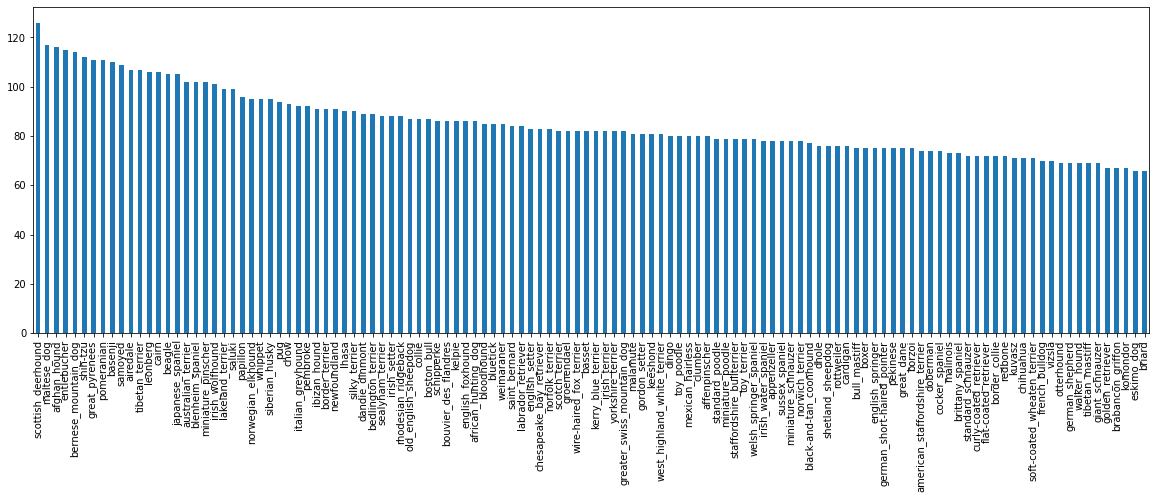

In [7]:
#Lets visualize it 
labels["breed"].value_counts().plot.bar(figsize=(20,6))

In [8]:
##what's the median of images of per class.
labels["breed"].value_counts().median()

82.0

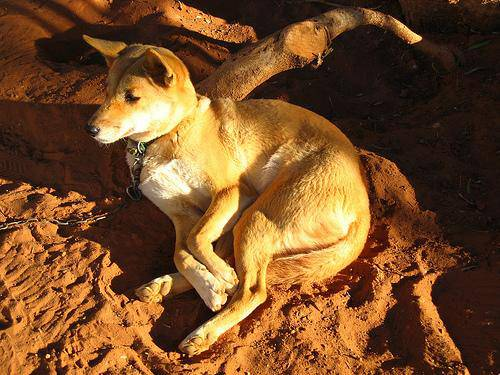

In [9]:
## let's view an image

from IPython.display import Image
Image("/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

# Getting Images and thier Labels

### Let's get a list of all our images pathNames

In [13]:
#Create PathNames from Image ID's from train set

filenames = ["/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/" + fname + ".jpg" for fname in labels["id"]]

filenames[:10]

['/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [11]:
## check  if the actual trian data matches the created  filename

import os
if len(os.listdir("/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/")) == len(filenames):
  print("File size matches")
else:
  print("file size does not match")

File size matches


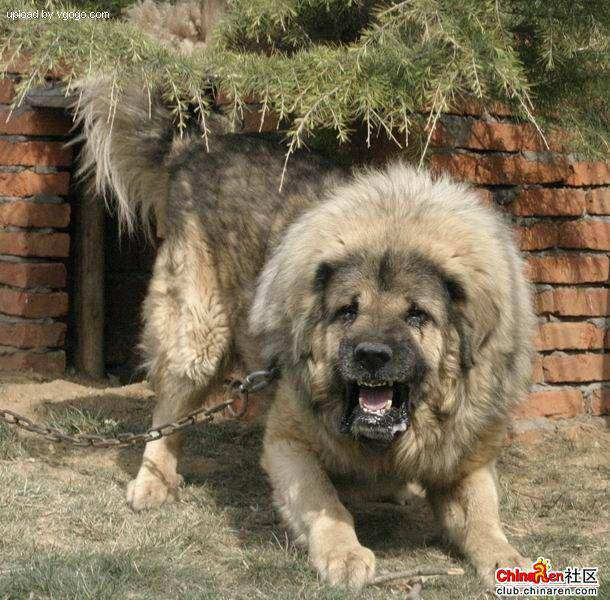

In [12]:
#one more check
Image(filenames[9000])

In [13]:
#check breed
labels["breed"][9000]

'tibetan_mastiff'

###  Preparing the labels (dependent variable or target[y]))

since we have now got the filePath for our trainning set in a list,lets prepare our labels


In [14]:
import numpy as np 
#get labels breed and covert to a numpy array
labels = labels["breed"].to_numpy() 

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
len(labels)

10222

In [15]:
## check to see if label matches filename(train set) size to see if there's a need for engineering features/labels

if len(labels) == len(filenames):
  print("YES!!")
else:
  print("DOES NOT MATCH")

YES!!


In [16]:
## Get the unique breeds

unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
## let's try turning one single breed to a boolean then we do it for the rest

print(labels[0])
#return true where labels[0] match unique_breeds
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
## Now let's turn every breed into boolean

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
## Now let's take a look at our labels in numerical format

print(labels[0]) # Original label name
print(np.where(unique_breeds == labels[0])) #Index where the label occur
print(boolean_labels[0].argmax()) #index where label occur in the boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occur in the boolean array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [21]:
## let's check another breed label to see where it appears in the boolean array

print(labels[20])
print(boolean_labels[20].astype(int))

doberman
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our validation set
Since the data from kaggle doesnt come with a validation set we are going to creaate our own

In [20]:
## it's important that we assign variables to our train set(filenames) and the Target(labels->boolean_labels) before we continue experimenting

x = filenames
y = boolean_labels

In [23]:
len(filenames), len(boolean_labels)

(10222, 10222)

We are going to start off expirementing with ~1000 images then increase as needed 

In [21]:
## Set Number of images to use for experimenting 
#Always remember to use CAP.

NUM_IMAGES = 1000 # @param{type:"slider", min:1000, max:10000, step:1000}

In [22]:
# import train_test_split and split data into train set and Validation set

from sklearn.model_selection import train_test_split

#split the data into train set and validation set of total size NUM_IMAGES
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size =0.2,
                                               random_state =42)
len(x_train), len(y_train),len(x_val),len(y_val) 


(800, 800, 200, 200)

In [23]:
## let have a look at our training data (fetch from train set(filenames) & label(boolean_labels))

x_train[:5], y_train[:2]

(['/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,

# Preprocessing images(Turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, i.e `image`.
2. Turn our `image` into  (a jpeg file) into Tensors.
3. Resize the image to be of shape (224, 224).
4. Return the modified `image`.

A good place to read about this type of function is the TensorFlow documentation on loading images. https://www.tensorflow.org/tutorials/load_data/images

You might be wondering why (224, 224), which is (heihgt, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.


In [48]:
## lets view the  colour channels of one image from the train set
## convert the image into Numpy Array

from matplotlib.pyplot import imread

image = imread(filenames[42])

In [49]:
image.shape

(257, 350, 3)

Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value. And you can easily convert it to a Tensor using `tf.constant()`.
evrey max size of 255 & and min value of 0, lets take a lot below

In [50]:
image.max(), image.min()

(255, 0)

In [51]:
## lets look at the image
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

so definetly we need to resize the images as stated in the preprocessing steps above.

So, instead of using a Numpy array we can replace with with Tensors which is much more better because it can run faster on a GPU. see below

In [52]:
## convert images to tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

### Preprocessing Function

Now we have seen what an image looks like as a Tensor, let's write a fucntion to preprocess all the images (trains set -> filenames), considerring the steps below

1. Takes an image filename as input.
2. Uses TensorFlow to read the file and save it to a variable, i.e `image`.
3. Turn our `image` into  (a jpeg file) into Tensors.
4. Normalize our chanels (convert our color chanel value from 0-255 to 0-1)
3. Resize the image to be of shape (224, 224).
4. Return the modified `image`.

In [53]:
# Define image size
IMG_SIZE = 224

def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file and convert to string
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  
  return image

## Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow `BatchDataset`).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of of Tensor tuples which looks like ths (`image`, `label`) So we'll build a function to do create those first. We'll take advantage of of `process_image` function at the same time. 

In [54]:

## Create a function to return a tuple of (image , label) 

def get_image_label(image_path,labels):
  """
  Take an image filepath name and it associated label,
  preprocess the image and retun a tuple(image,label)
  """
  image = process_image(image_path)
  return image,labels

In [55]:
 ## A demo of what's happing above for a single image

# (process_image(x[42]), y[42])
 
 # let covert the labels to tensors as well
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a simple function to turn our image file path names and their associated labels into tuples (we can turn these into Tensors next), we'll create a function to make all our data (`x[filenames]` & `y[boolean_labels]`) into  batches.

Because we'll be dealing with 3 different sets of data (training, validation and test), we'll make sure the function can accomodate for each set.

We'll set a default batch size of 32 because according to Yann Lecun  

In [63]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels

    #use the get_image_label function above to map since data contains labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) 
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    # use the get_image_label function above to map  since data contains labels
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [64]:
# create trainng and validation data batches 

train_data  = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val)

Creating training data batches...
Creating training data batches...


In [58]:
## Check the different attribute of our data batches 

train_data.element_spec, val_data.element_spec 

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing our data batches above 

Let's build a function which helps us visualize the train_data & val_data batch

In [59]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

**we need to unbatch the train_data and Val_data batch to numpy before we can visualize it with the function above**

We can do so by calling the `as_numpy_iterator()` method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to `next()` will return the next item in the iterator.

In our case, next will return a batch of 32 images and label pairs.

**note**: the method below may take time to run because the images will take time shuffled when they are mapped, which is already computed in the function above.

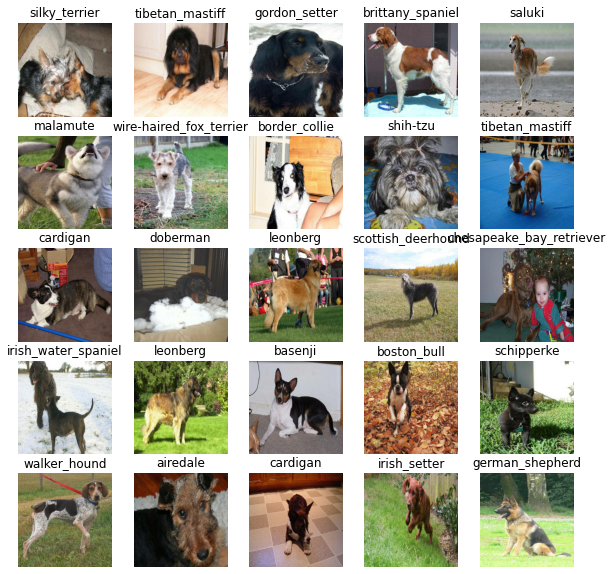

In [60]:
# Visualize training images from the training data batch after unbatching 
train_images, train_labels = next(train_data.as_numpy_iterator()) 
show_25_images(train_images, train_labels)

If you rerun the cell above the images are going to shuffle

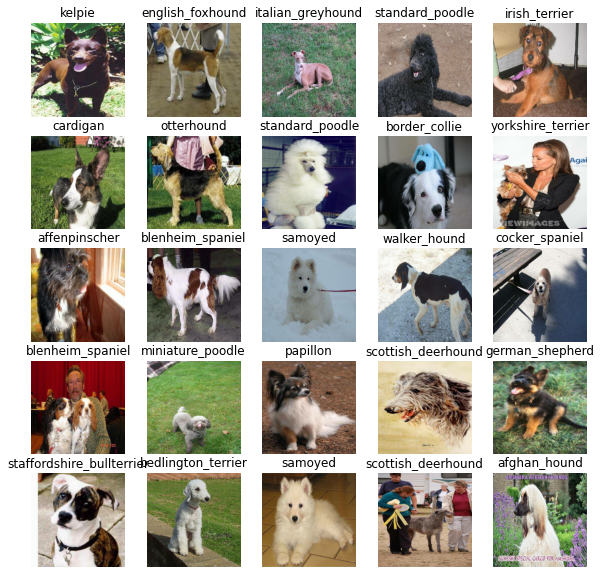

In [61]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)